In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("/content/AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
# Genaral information about the data types and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287568 entries, 0 to 287567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            287568 non-null  int64  
 1   type            287568 non-null  object 
 2   amount          287568 non-null  float64
 3   nameOrig        287568 non-null  object 
 4   oldbalanceOrg   287568 non-null  float64
 5   newbalanceOrig  287568 non-null  float64
 6   nameDest        287567 non-null  object 
 7   oldbalanceDest  287567 non-null  float64
 8   newbalanceDest  287567 non-null  float64
 9   isFraud         287567 non-null  float64
 10  isFlaggedFraud  287567 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 24.1+ MB


In [6]:
# Column names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
# To count Fraud and non Fraud accounts
df["isFraud"].value_counts()

,count
isFraud,
0.0,287390
1.0,177


In [8]:
# To count IsFlaggedFraud accounts
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,287567


In [9]:
# Cheking null values
df.isnull().sum().sum()

np.int64(5)

In [10]:
# The shape of the data
df.shape

(287568, 11)

In [11]:
# the percentage of Fraud to the Total data
round(df["isFraud"].value_counts()[1] / df.shape[0] *100, 2)

np.float64(0.06)

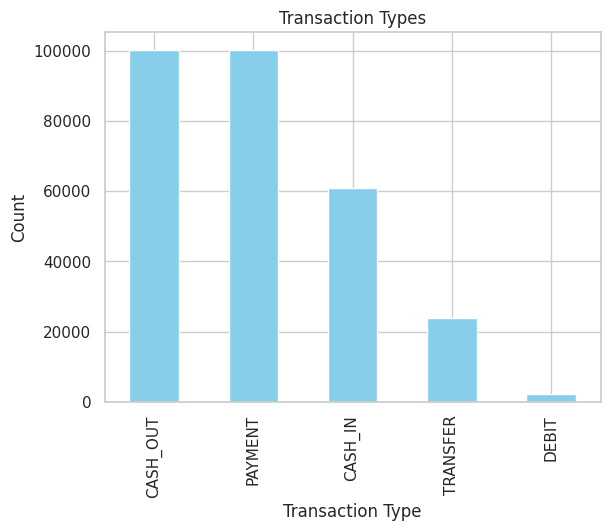

In [12]:
# Visualizing the Transaction type
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

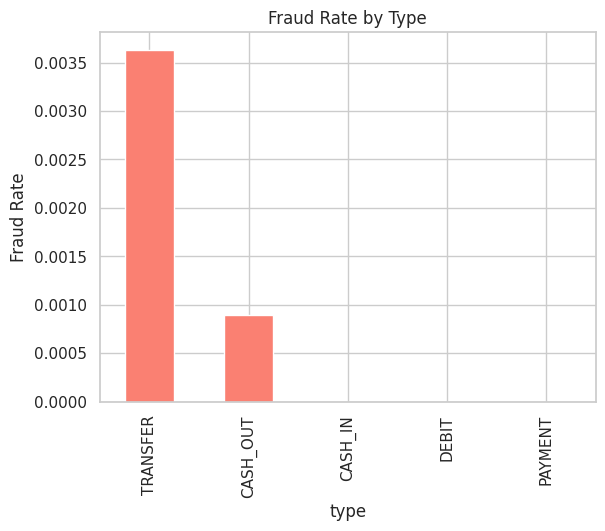

In [13]:
# Fraud by type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [14]:
# Statistics
df["amount"].describe().astype(int)

,amount
count,287568
mean,176833
std,304695
min,0
25%,12673
50%,76940
75%,231414
max,10000000


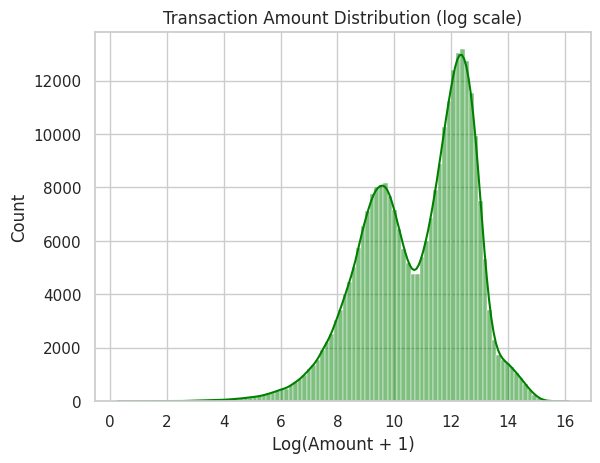

In [15]:
# Histogram for it
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

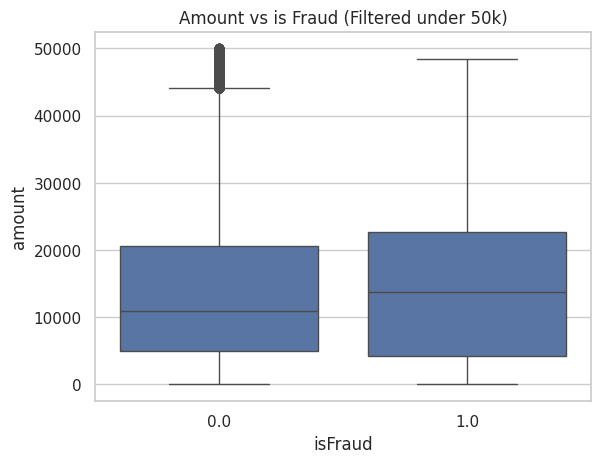

In [16]:
# The relationship between Fraud and the Amounts
sns.boxplot(data= df[df["amount"] < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs is Fraud (Filtered under 50k)")
plt.show()

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
# The balance changed and anomllus
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]


In [19]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(60810)

In [20]:
(df["balanceDiffDest"] < 0).sum()

np.int64(55087)

In [21]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


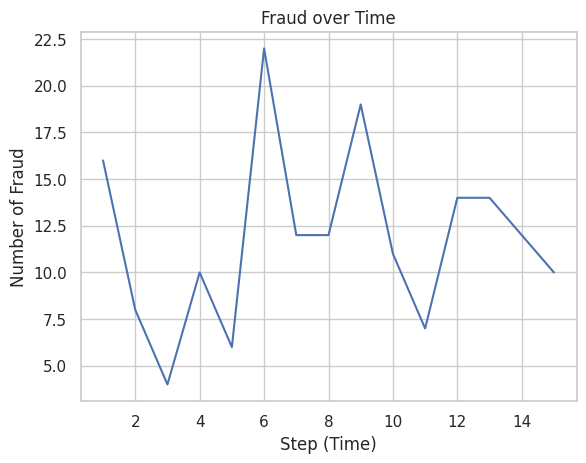

In [22]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="fraud per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Fraud")
plt.title("Fraud over Time")
plt.grid(True)
plt.show()

In [23]:
df.drop(columns="step", inplace=True)

In [24]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [25]:
# Customer
top_senders = df["nameOrig"].value_counts().head(10)
top_receivers = df["nameDest"].value_counts().head(10)


In [26]:
top_senders

,count
nameOrig,
C675934000,2
C1884851412,2
C1709295811,2
C260230637,2
C1842781381,2
C745009740,2
C199116739,2
C779875094,2
C189326840,2


In [27]:
top_receivers

,count
nameDest,
C985934102,85
C1286084959,84
C2083562754,79
C248609774,79
C665576141,77
C1590550415,76
C977993101,73
C1360767589,72
C451111351,70


In [28]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [29]:
fraud_users

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [30]:
# Transfer and Cashout
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [31]:
fraud_types_count = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]["type"].value_counts()
display(fraud_types_count)

,count
type,
CASH_OUT,100318
TRANSFER,23950


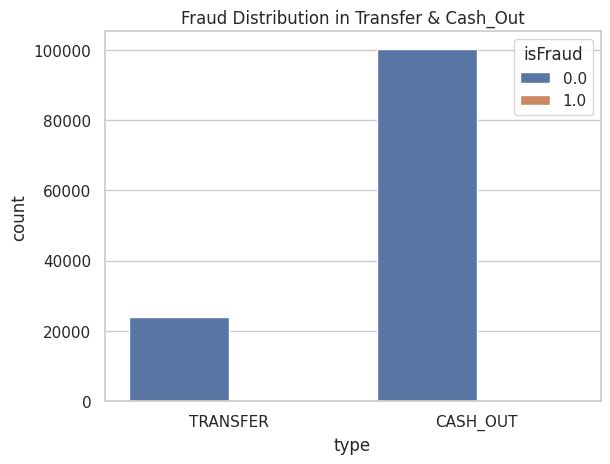

In [32]:
sns.countplot(data=df[df["type"].isin(["TRANSFER", "CASH_OUT"])], x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [33]:
corr = df.select_dtypes(include=np.number).corr()
display(corr)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
amount,1.000000,-0.017957,-0.021109,0.215518,0.331215,0.047190,NaN,0.073989,0.471791
oldbalanceOrg,-0.017957,1.000000,0.999025,0.094399,0.063649,-0.001188,NaN,-0.265298,-0.078030
newbalanceOrig,-0.021109,0.999025,1.000000,0.096009,0.062848,-0.007657,NaN,-0.307606,-0.085961
oldbalanceDest,0.215518,0.094399,0.096009,1.000000,0.959462,-0.007572,NaN,-0.062220,0.170516
newbalanceDest,0.331215,0.063649,0.062848,0.959462,1.000000,-0.004130,NaN,-0.000729,0.441314
isFraud,0.047190,-0.001188,-0.007657,-0.007572,-0.004130,1.000000,NaN,0.141609,0.009672
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balanceDiffOrig,0.073989,-0.265298,-0.307606,-0.062220,-0.000729,0.141609,NaN,1.000000,0.195558
balanceDiffDest,0.471791,-0.078030,-0.085961,0.170516,0.441314,0.009672,NaN,0.195558,1.000000


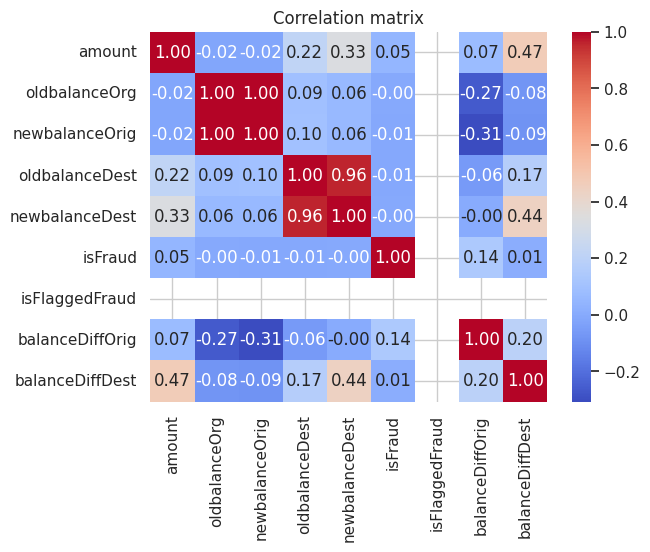

In [34]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [37]:
# Filter the customers
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0 ) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [38]:
len(zero_after_transfer)

50340

In [39]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,2712905.89


In [40]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,287390
1.0,177


In [41]:
# Feature selection and prepration
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [43]:
# Drop some
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [45]:
# Set categorical
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [48]:
from re import X
df_model.dropna(subset=["isFraud"], inplace=True)
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [51]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [53]:
# Model pipline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [55]:
# Model prediction
y_pred = pipeline.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     86218
         1.0       0.00      0.89      0.01        53

    accuracy                           0.85     86271
   macro avg       0.50      0.87      0.46     86271
weighted avg       1.00      0.85      0.92     86271



In [58]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[73692, 12526],
       [    6,    47]])

In [60]:
# Model accurecy
pipeline.score(X_test, y_test) *100

85.47368177023566